In [1]:
import collections
import pandas as pd 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import json  
%matplotlib inline

In [2]:
Yelp_Reviews = pd.read_json('YelpDataset/review.json',lines=True)
# load in review data

In [3]:
Yelp_Users = pd.read_json('YelpDataset/user.json',lines=True)
# load in user data

In [4]:
Yelp_Business = pd.read_json('YelpDataset/business.json',lines=True)
# Read in business information

## Distributions of the review string length and the frequencies

In [5]:
# trying to find a relationship between star ratings and length of review

Yelp_Reviews['Review string length'] = Yelp_Reviews['text'].apply(len)

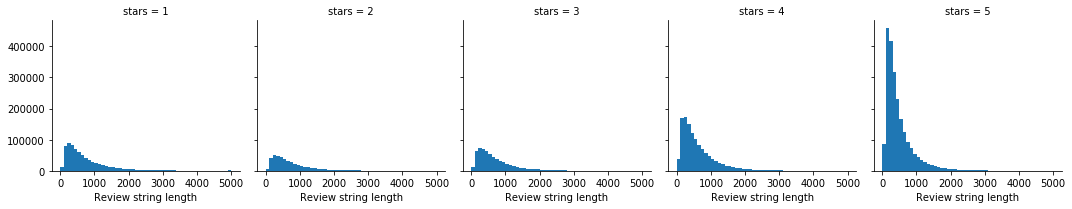

In [9]:
g = sns.FacetGrid(data = Yelp_Reviews, col='stars')
g.savefig("TechReportFigures/Star&ReviewLength/lengthWithStars.png")
g.savefig("TechReportFigures/Star&ReviewLength/lengthWithStars.svg")
g.map(plt.hist, 'Review string length', bins = 50)


## Now we want to see how the star rating correlates to the review length

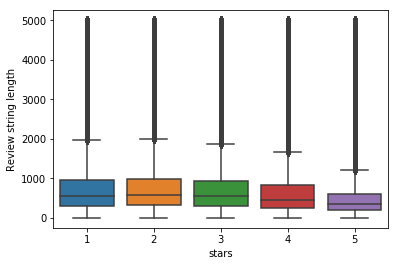

In [7]:
sns.boxplot(x = 'stars', y = 'Review string length', data = Yelp_Reviews)


In [8]:
stars = Yelp_Reviews.groupby('stars').mean()
stars.corr()

,cool,funny,useful,Review string length
cool,1.000000,-0.442860,-0.767887,-0.503943
funny,-0.442860,1.000000,0.797196,0.981424
useful,-0.767887,0.797196,1.000000,0.750503
Review string length,-0.503943,0.981424,0.750503,1.000000


## Star rating distribution for businesses

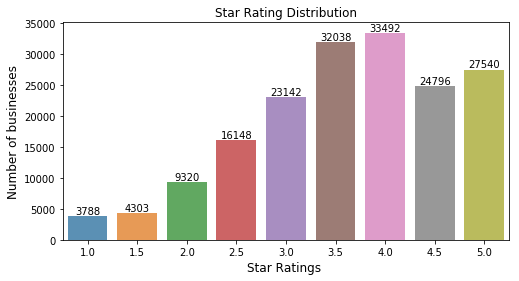

In [10]:
x=Yelp_Business['stars'].value_counts()
x=x.sort_index()
#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Star Rating Distribution")
plt.ylabel('Number of businesses', fontsize=12)
plt.xlabel('Star Ratings ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.savefig("TechReportFigures/Star&ReviewLength/starDist.png")
plt.savefig("TechReportFigures/Star&ReviewLength/starDist.svg")
plt.show()
#beta distribution negatively skewed

## The most popular cities

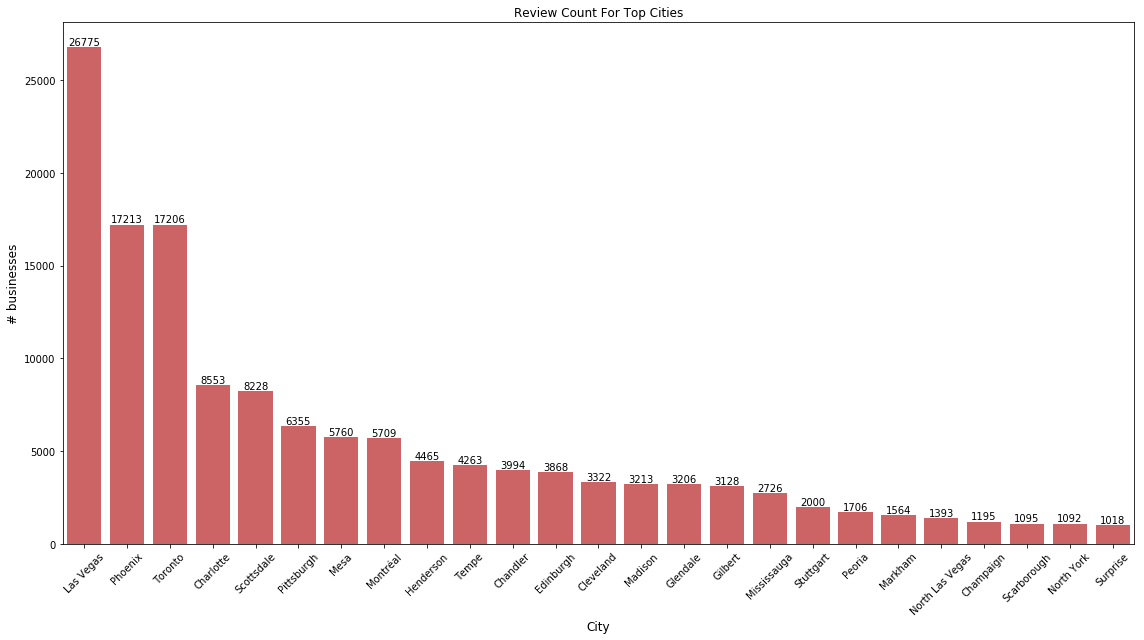

In [16]:
#Get the distribution of the ratings
x=Yelp_Business['city'].value_counts()
x=x.sort_values(ascending=False)
x=x.iloc[0:25]
plt.figure(figsize=(16,9))
ax = sns.barplot(x.index, x.values, alpha=0.8,color=color[3])
plt.title("Review Count For Top Cities")
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.ylabel('# businesses', fontsize=12)
plt.xlabel('City', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.tight_layout()
plt.savefig("TechReportFigures/Star&ReviewLength/cityPop.png")
plt.savefig("TechReportFigures/Star&ReviewLength/cityPop.svg")
plt.show()